Determination of fractional contributions of hadrons
----------------------------------------------------

This notebook reproduces Figure for Modeling of hadronic interactions with SIBYLL2.3c paper.

In [1]:
#basic imports and ipython setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os, sys
import matplotlib.pyplot as plt
import numpy as np
#import solver related modules
from MCEq.core import MCEqRun
import mceq_config as config
#import primary model choices
import crflux.models as pm

In [2]:
# How to name plots
model_str = "SIBYLL23d"

In [3]:
config.mceq_db_fname = "mceq_db_fine_v150_inc_custom_decay.h5"

In [4]:
mceq_run = MCEqRun(
    # provide the string of the interaction model
    # interaction_model='SIBYLL2.3c',
    interaction_model="SIBYLL23d",
    # primary cosmic ray flux model
    # support a tuple (primary model class (not instance!), arguments)
    primary_model=(pm.GlobalSplineFitBeta, None),
    # Zenith angle in degrees. 0=vertical, 90=horizontal
    theta_deg=60.0,
    # expand the rest of the options from mceq_config.py
)

MCEqRun::set_interaction_model(): SIBYLL23D
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Global Spline Fit


In [7]:
res_groups = [
    (["D+", "D-", "D*+", "D*-"], "$D^\\pm$"),
    (["D0", "Dbar0", "D*bar0", "D*0"], "$D^0$"),
    (["D+", "D-"], r"D$^+$ + D$^-$"),
    (["D0", "Dbar0"], r"D$^0$ + $\bar{\rm D}^0$"),
    (["D_s+", "D_s-"], "$D_s$"),
    (["D*+", "D*-", "D*0", "D*bar0"], r"D$^*$"),
    (["K_S0"], "$K^0_s$"),
    (["K_L0"], "$K^0_L$"),
    (["Lambda_c+", "Lambda_cbar-"], "$\\Lambda_{\\rm c}$"),
    (
        [
            "Omega_c0",
            "Xi_c+",
            "Xi_cbar-",
            "Xi_c0",
            "Xi_cbar0",
            "Sigma*_c+",
            "Sigma*_c++",
            "tau+",
            "tau-",
            "Sigma*_cbar--",
            "Sigma*_cbar-",
            "Sigma*_c0",
            "Sigma*_cbar0",
            "Sigma_c+",
            "Sigma_c++",
            "Sigma_cbar--",
            "Sigma_cbar-",
            "Sigma_c0",
            "Sigma_cbar0",
        ],
        "other prompt",
    ),
    (
        [
            "K_S0",
            "K_L0",
            "n0",
            "nbar0",
            "p+",
            "pbar-",
            "Lambda0",
            "Lambdabar0",
            "Sigma-",
            "Sigmabar+",
            "Xi-",
            "Xibar+",
            "Xi0",
            "Xibar0",
            "Delta-",
            "Deltabar+",
            "Delta0",
            "Deltabar0",
            "K*+",
            "K*-",
            "K*0",
            "K*bar0",
            "Omega-",
            "Omegabar+",
            "Sigma*+",
            "Sigma*bar-",
            "Sigma*-",
            "Sigma*bar+",
            "Sigma*0",
            "Sigma*bar0",
            "Sigma+",
            "Sigmabar-",
            "Sigma0",
            "Sigmabar0",
            "Delta+",
            "Delta++",
            "Deltabar--",
            "Deltabar-",
            "Xi*-",
            "Xi*bar+",
            "Xi*0",
            "Xi*bar0",
        ],
        "other conv. mu",
    ),
    (
        [
            "K_S0",
            "K_L0",
            "n0",
            "nbar0",
            "p+",
            "pbar-",
            "Lambda0",
            "Lambdabar0",
            "Sigma-",
            "Sigmabar+",
            "Xi-",
            "Xibar+",
            "Xi0",
            "Xibar0",
            "Delta-",
            "Deltabar+",
            "Delta0",
            "Deltabar0",
            "K*+",
            "K*-",
            "K*0",
            "K*bar0",
            "Omega-",
            "Omegabar+",
            "Sigma*+",
            "Sigma*bar-",
            "Sigma*-",
            "Sigma*bar+",
            "Sigma*0",
            "Sigma*bar0",
            "Sigma+",
            "Sigmabar-",
            "Sigma0",
            "Sigmabar0",
            "Delta+",
            "Delta++",
            "Deltabar--",
            "Deltabar-",
            "Xi*-",
            "Xi*bar+",
            "Xi*0",
            "Xi*bar0",
            "eta",
            "eta'",
            "omega",
            "phi",
            "pi0",
            "rho+",
            "rho-",
            "rho0",
        ],
        "other conv. numu",
    ),
    (
        [
            "n0",
            "nbar0",
            "p+",
            "pbar-",
            "Lambda0",
            "Lambdabar0",
            "Sigma-",
            "Sigmabar+",
            "Xi-",
            "Xibar+",
            "Xi0",
            "Xibar0",
            "Delta-",
            "Deltabar+",
            "Delta0",
            "Deltabar0",
            "K*+",
            "K*-",
            "K*0",
            "K*bar0",
            "Omega-",
            "Omegabar+",
            "Sigma*+",
            "Sigma*bar-",
            "Sigma*-",
            "Sigma*bar+",
            "Sigma*0",
            "Sigma*bar0",
            "Sigma+",
            "Sigmabar-",
            "Sigma0",
            "Sigmabar0",
            "Delta+",
            "Delta++",
            "Deltabar--",
            "Deltabar-",
            "Xi*-",
            "Xi*bar+",
            "Xi*0",
            "Xi*bar0",
            "eta",
            "eta'",
            "omega",
            "phi",
            "pi0",
            "rho+",
            "rho-",
            "rho0",
        ],
        "other conv. nue",
    ),
    (
        [
            "eta",
            "eta'",
            "omega",
            "phi",
            "pi0",
            "rho+",
            "rho-",
            "rho0",
            "eta_c",
            "J/psi",
        ],
        "unflavored",
    ),
    (["tau+", "tau-"], "tau decay"),
    ([(13, -1), (13, 0), (13, 1), (-13, -1), (-13, 0), (-13, 1)], "$\\mu$ decay"),
    (["eta"], r"$\eta$"),
    (["eta'"], r"$\eta'$"),
    (["omega"], r"$\omega$"),
    (["phi"], r"$\phi$"),
    (["pi0"], r"$\pi^0$"),
    (["rho+", "rho-"], r"$\rho^\pm$"),
    (["rho0"], r"$\rho^0$"),
    (["eta_c"], r"$\eta_C$"),
    (["J/psi"], r"$J/\Psi$"),
]

color_spectrum = [
    "k",
    "b",
    "r",
    "g",
    "orange",
    "cyan",
    "violet",
    "brown",
    "pink",
    "yellow",
    "lightblue",
]

fpm = mceq_run.pman
for rg, lg in res_groups:
    existing = []
    for p in rg:
        try:
            existing.append(fpm[p].pdg_id)
        except KeyError:
            print(p, "not found")
    fpm.track_leptons_from(existing, lg + "_")

In [8]:
mceq_run._resize_vectors_and_restore()
mceq_run.regenerate_matrices() # Takes a while
mceq_run.solve() # Quick

MCEqRun::set_primary_model(): Primary model set to Global Spline Fit


In [9]:
mag = 3.0

# Auslesen
mu_obs = {}
mu_ratio_obs = {}

numu_obs = {}
numu_ratio_obs = {}

nue_obs = {}
nue_ratio_obs = {}

numu_nue_ratio_obs = {}
nutau_obs = {}
for res_group, res_title in res_groups:
    print(res_title)
    mu_obs[res_title] = mceq_run.get_solution(
        res_title + "_mu+", mag
    ) + mceq_run.get_solution(res_title + "_mu-", mag)
    mu_ratio_obs[res_title] = mceq_run.get_solution(
        res_title + "_mu+", mag
    ) / mceq_run.get_solution(res_title + "_mu-", mag)

    numu_obs[res_title] = mceq_run.get_solution(
        res_title + "_numu", mag
    ) + mceq_run.get_solution(res_title + "_antinumu", mag)
    numu_ratio_obs[res_title] = mceq_run.get_solution(
        res_title + "_numu", mag
    ) / mceq_run.get_solution(res_title + "_antinumu", mag)

    nue_obs[res_title] = mceq_run.get_solution(
        res_title + "_nue", mag
    ) + mceq_run.get_solution(res_title + "_antinue", mag)
    nue_ratio_obs[res_title] = mceq_run.get_solution(
        res_title + "_nue", mag
    ) / mceq_run.get_solution(res_title + "_antinue", mag)

    numu_nue_ratio_obs[res_title] = (
        mceq_run.get_solution(res_title + "_numu", mag)
        + mceq_run.get_solution(res_title + "_antinumu", mag)
    ) / (
        mceq_run.get_solution(res_title + "_nue", mag)
        + mceq_run.get_solution(res_title + "_antinue", mag)
    )

    nutau_obs[res_title] = mceq_run.get_solution(
        res_title + "_nutau", mag
    ) + mceq_run.get_solution(res_title + "_antinutau", mag)

$D^\pm$
$D^0$
D$^+$ + D$^-$
D$^0$ + $\bar{\rm D}^0$
$D_s$
D$^*$
$K^0_s$
$K^0_L$
$\Lambda_{\rm c}$
other prompt
other conv. mu
other conv. numu
other conv. nue
unflavored
tau decay
$\mu$ decay
$\eta$
$\eta'$
$\omega$
$\phi$
$\pi^0$
$\rho^\pm$
$\rho^0$
$\eta_C$
$J/\Psi$


/var/folders/gv/2f_2jdnx0_10yvjmxqdj0pcm0000gn/T/ipykernel_92670/729038423.py:20: RuntimeWarning: invalid value encountered in divide
  mu_ratio_obs[res_title] = mceq_run.get_solution(
/var/folders/gv/2f_2jdnx0_10yvjmxqdj0pcm0000gn/T/ipykernel_92670/729038423.py:27: RuntimeWarning: invalid value encountered in divide
  numu_ratio_obs[res_title] = mceq_run.get_solution(
/var/folders/gv/2f_2jdnx0_10yvjmxqdj0pcm0000gn/T/ipykernel_92670/729038423.py:34: RuntimeWarning: invalid value encountered in divide
  nue_ratio_obs[res_title] = mceq_run.get_solution(
/var/folders/gv/2f_2jdnx0_10yvjmxqdj0pcm0000gn/T/ipykernel_92670/729038423.py:38: RuntimeWarning: invalid value encountered in divide
  numu_nue_ratio_obs[res_title] = (


In [10]:
mu_conv = mceq_run.get_solution("conv_mu+", mag) + mceq_run.get_solution(
    "conv_mu-", mag
)

numu_conv = mceq_run.get_solution("conv_numu", mag) + mceq_run.get_solution(
    "conv_antinumu", mag
)

nue_conv = mceq_run.get_solution("conv_nue", mag) + mceq_run.get_solution(
    "conv_antinue", mag
)

mu_prompt = mceq_run.get_solution("pr_mu+", mag) + mceq_run.get_solution("pr_mu-", mag)

numu_prompt = mceq_run.get_solution("pr_numu", mag) + mceq_run.get_solution(
    "pr_antinumu", mag
)

nue_prompt = mceq_run.get_solution("pr_nue", mag) + mceq_run.get_solution(
    "pr_antinue", mag
)


mu_total = mceq_run.get_solution("total_mu+", mag) + mceq_run.get_solution(
    "total_mu-", mag
)

numu_total = mceq_run.get_solution("total_numu", mag) + mceq_run.get_solution(
    "total_antinumu", mag
)

nue_total = mceq_run.get_solution("total_nue", mag) + mceq_run.get_solution(
    "total_antinue", mag
)

nutau_total = mceq_run.get_solution("total_nutau", mag) + mceq_run.get_solution(
    "total_antinutau", mag
)

mu_pi = mceq_run.get_solution("pi_mu+", mag) + mceq_run.get_solution("pi_mu-", mag)

numu_pi = mceq_run.get_solution("pi_numu", mag) + mceq_run.get_solution(
    "pi_antinumu", mag
)

nue_pi = mceq_run.get_solution("pi_nue", mag) + mceq_run.get_solution("pi_antinue", mag)

mu_k = mceq_run.get_solution("k_mu+", mag) + mceq_run.get_solution("k_mu-", mag)

numu_k = mceq_run.get_solution("k_numu", mag) + mceq_run.get_solution("k_antinumu", mag)

nue_k = mceq_run.get_solution("k_nue", mag) + mceq_run.get_solution("k_antinue", mag)

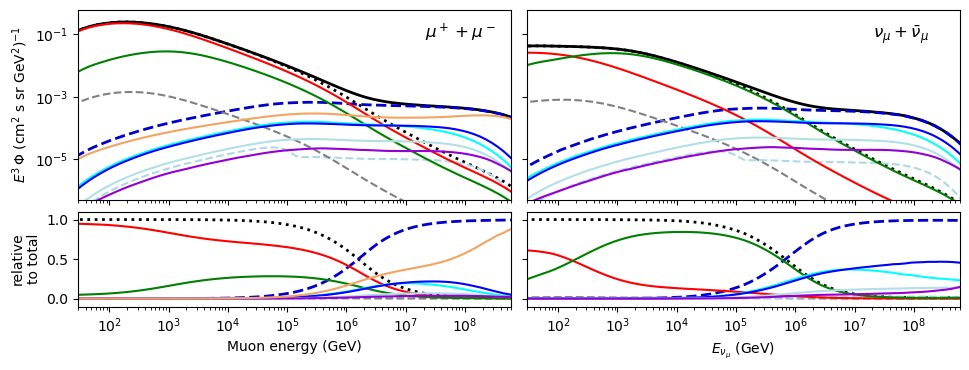

In [11]:
e_grid = mceq_run.e_grid

fig, axes = plt.subplots(
    2,
    2,
    figsize=(9.5, 3.5),
    sharex=True,  # sharey=True,
    gridspec_kw={"height_ratios": [2, 1]},
)
total_line = axes[0, 0].plot(
    e_grid, mu_total, ls="-", lw=2, color="black", label="total"
)
conv_line = axes[0, 0].plot(
    e_grid, mu_conv, ls="dotted", lw=2, color="black", label=r"total conv."
)
pr_line = axes[0, 0].plot(
    e_grid, mu_prompt, ls="--", lw=2, color="mediumblue", label="total prompt"
)
opr_line = axes[0, 0].plot(
    e_grid,
    mu_obs["other prompt"],
    ls="--",
    lw=1.5,
    color="lightblue",
    label=r"other prompt",
)
oconv_line = axes[0, 0].plot(
    e_grid,
    mu_obs["other conv. mu"],
    ls="--",
    lw=1.5,
    color="grey",
    label=r"other conv.",
)
pi_line = axes[0, 0].plot(e_grid, mu_pi, ls="-", lw=1.5, color="red", label=r"$\pi$")
k_line = axes[0, 0].plot(e_grid, mu_k, ls="-", lw=1.5, color="green", label=r"K$^\pm$")
dpm_line = axes[0, 0].plot(
    e_grid, mu_obs["$D^\\pm$"], ls="-", lw=1.5, color="cyan", label=r"D$^\pm$"
)
d0_line = axes[0, 0].plot(
    e_grid, mu_obs["$D^0$"], ls="-", lw=1.5, color="b", label=r"D$^0$"
)
ds_line = axes[0, 0].plot(
    e_grid,
    mu_obs["$D_s$"],
    ls="-",
    lw=1.5,
    color="powderblue",
    label=r"${\rm D}_{\rm s}$",
)
lamc_line = axes[0, 0].plot(
    e_grid,
    mu_obs[r"$\Lambda_{\rm c}$"],
    ls="-",
    lw=1.5,
    color="darkviolet",
    label=r"$\Lambda_{\rm c}$",
)
unfl_line = axes[0, 0].plot(
    e_grid,
    mu_obs["unflavored"],
    ls="-",
    lw=1.5,
    color="sandybrown",
    label=r"unflavored",
)
axes[0, 0].text(
    0.8, 0.85, r"$\mu^+ + \mu^-$", fontsize="large", transform=axes[0, 0].transAxes
)

axes[0, 0].loglog()
axes[0, 0].set_ylabel(r"$E^3\,\Phi$ (cm$^{2}$ s sr GeV$^2$)$^{-1}$")
axes[0, 0].set_xlim([30, 6e8])
axes[0, 0].set_ylim([5e-7, 6e-1])

axes[1, 0].plot(
    e_grid, mu_conv / mu_total, ls="dotted", lw=2, color="black", label=r"total conv."
)
axes[1, 0].plot(
    e_grid,
    mu_prompt / mu_total,
    ls="--",
    lw=2,
    color="mediumblue",
    label="total prompt",
)
axes[1, 0].plot(
    e_grid,
    mu_obs["other prompt"] / mu_total,
    ls="--",
    lw=1.5,
    color="lightblue",
    label=r"other prompt",
)
axes[1, 0].plot(
    e_grid,
    mu_obs["other conv. mu"] / mu_total,
    ls="--",
    lw=1.5,
    color="grey",
    label=r"other conv.",
)
axes[1, 0].plot(e_grid, mu_pi / mu_total, ls="-", lw=1.5, color="red", label=r"$\pi$")
axes[1, 0].plot(
    e_grid, mu_k / mu_total, ls="-", lw=1.5, color="green", label=r"K$^\pm$"
)
axes[1, 0].plot(
    e_grid,
    mu_obs["$D^\\pm$"] / mu_total,
    ls="-",
    lw=1.5,
    color="cyan",
    label=r"D$^\pm$",
)
axes[1, 0].plot(
    e_grid, mu_obs["$D^0$"] / mu_total, ls="-", lw=1.5, color="b", label=r"D$^0$"
)
axes[1, 0].plot(
    e_grid,
    mu_obs["$D_s$"] / mu_total,
    ls="-",
    lw=1.5,
    color="powderblue",
    label=r"${\rm D}_{\rm s}$",
)
axes[1, 0].plot(
    e_grid,
    mu_obs[r"$\Lambda_{\rm c}$"] / mu_total,
    ls="-",
    lw=1.5,
    color="darkviolet",
    label=r"$\Lambda_{\rm c}$",
)
axes[1, 0].plot(
    e_grid,
    mu_obs["unflavored"] / mu_total,
    ls="-",
    lw=1.5,
    color="sandybrown",
    label=r"unflavored",
)


axes[1, 0].set_ylim([-0.1, 1.1])
axes[1, 0].set_ylabel("relative\nto total")
axes[1, 0].set_xlabel(r"Muon energy (GeV)")

axes[0, 1].plot(e_grid, numu_total, ls="-", lw=2, color="black", label="total")
axes[0, 1].plot(
    e_grid, numu_conv, ls="dotted", lw=2, color="black", label=r"total conv."
)
axes[0, 1].plot(
    e_grid, numu_prompt, ls="--", lw=2, color="mediumblue", label="total prompt"
)
axes[0, 1].plot(
    e_grid,
    numu_obs["other conv. numu"],
    ls="--",
    lw=1.5,
    color="grey",
    label=r"other conv.",
)
axes[0, 1].plot(
    e_grid,
    numu_obs["other prompt"],
    ls="--",
    lw=1.5,
    color="lightblue",
    label=r"other prompt",
)
axes[0, 1].plot(e_grid, numu_pi, ls="-", lw=1.5, color="red", label=r"$\pi$")
axes[0, 1].plot(e_grid, numu_k, ls="-", lw=1.5, color="green", label=r"K$^\pm$")
axes[0, 1].plot(
    e_grid, numu_obs["$D^\\pm$"], ls="-", lw=1.5, color="cyan", label=r"D$^\pm$"
)
axes[0, 1].plot(e_grid, numu_obs["$D^0$"], ls="-", lw=1.5, color="b", label=r"D$^0$")
axes[0, 1].plot(
    e_grid,
    numu_obs["$D_s$"],
    ls="-",
    lw=1.5,
    color="powderblue",
    label=r"${\rm D}_{\rm s}$",
)
axes[0, 1].plot(
    e_grid,
    numu_obs[r"$\Lambda_{\rm c}$"],
    ls="-",
    lw=1.5,
    color="darkviolet",
    label=r"$\Lambda_{\rm c}$",
)
axes[0, 1].loglog()
axes[0, 1].get_yaxis().set_ticklabels([])
axes[0, 1].text(
    0.8,
    0.85,
    r"$\nu_\mu + \bar{\nu}_\mu$",
    fontsize="large",
    transform=axes[0, 1].transAxes,
)
axes[0, 1].set_xlim([30, 6e8])
axes[0, 1].set_ylim([5e-7, 6e-1])

axes[1, 1].plot(
    e_grid,
    numu_conv / numu_total,
    ls="dotted",
    lw=2,
    color="black",
    label=r"total conv.",
)
axes[1, 1].plot(
    e_grid,
    numu_prompt / numu_total,
    ls="--",
    lw=2,
    color="mediumblue",
    label="total prompt",
)
axes[1, 1].plot(
    e_grid,
    numu_obs["other conv. numu"] / numu_total,
    ls="--",
    lw=1.5,
    color="grey",
    label=r"other conv.",
)
axes[1, 1].plot(
    e_grid,
    numu_obs["other prompt"] / numu_total,
    ls="--",
    lw=1.5,
    color="lightblue",
    label=r"other prompt",
)
axes[1, 1].plot(
    e_grid, numu_pi / numu_total, ls="-", lw=1.5, color="red", label=r"$\pi$"
)
axes[1, 1].plot(
    e_grid, numu_k / numu_total, ls="-", lw=1.5, color="green", label=r"K$^\pm$"
)
axes[1, 1].plot(
    e_grid,
    numu_obs["$D^\\pm$"] / numu_total,
    ls="-",
    lw=1.5,
    color="cyan",
    label=r"D$^\pm$",
)
axes[1, 1].plot(
    e_grid, numu_obs["$D^0$"] / numu_total, ls="-", lw=1.5, color="b", label=r"D$^0$"
)
axes[1, 1].plot(
    e_grid,
    numu_obs["$D_s$"] / numu_total,
    ls="-",
    lw=1.5,
    color="powderblue",
    label=r"${\rm D}_{\rm s}$",
)
axes[1, 1].plot(
    e_grid,
    numu_obs[r"$\Lambda_{\rm c}$"] / numu_total,
    ls="-",
    lw=1.5,
    color="darkviolet",
    label=r"$\Lambda_{\rm c}$",
)
axes[1, 1].get_yaxis().set_ticklabels([])

axes[1, 1].set_xlabel(r"$E_{\nu_{\mu}}$ (GeV)")
axes[1, 1].set_ylim([-0.1, 1.1])
plt.tight_layout(pad=0.0, h_pad=0.5, w_pad=0.5)  # ,rect=[0.0, 0.0, 1., 1.])
# nbu.save("hadr_breakdown_1")
# axes[0,1].legend(loc='upper right', frameon=False, numpoints=1, ncol=2,fontsize='small')
# axes[0,1].text(0.035,0.9,r'$\nu_\mu$',fontsize='small', transform = plt.gca().transAxes)

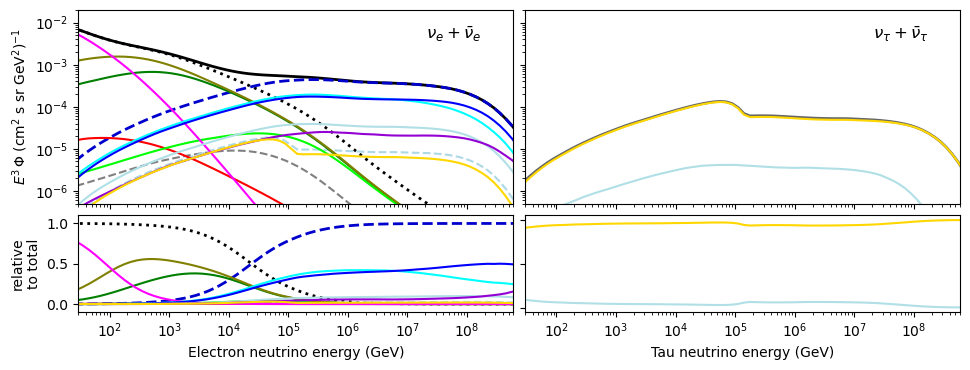

In [12]:
e_grid = mceq_run.e_grid

fig, axes = plt.subplots(
    2,
    2,
    figsize=(9.5, 3.5),
    sharex=True,  # sharey=True,
    gridspec_kw={"height_ratios": [2, 1]},
)
# total_line = axes[0,0].plot(e_grid, mu_total, ls='-', lw=2, color='black', label='total')
# conv_line = axes[0,0].plot(e_grid, mu_conv, ls='dotted', lw=2, color='black', label=r'total conv.')
# pr_line = axes[0,0].plot(e_grid, mu_prompt, ls='--', lw=2, color='mediumblue', label='total prompt')
# opr_line = axes[0,0].plot(e_grid, mu_obs['other prompt'], ls='--', lw=1.5, color='lightblue', label=r'other prompt')
# oconv_line = axes[0,0].plot(e_grid, mu_obs['other conv. mu'], ls='--', lw=1.5, color='grey', label=r'other conv.')
# pi_line = axes[0,0].plot(e_grid, mu_pi, ls='-', lw=1.5, color='red', label=r'$\pi$')
# k_line = axes[0,0].plot(e_grid, mu_k, ls='-', lw=1.5, color='green', label=r'K')
# dpm_line = axes[0,0].plot(e_grid, mu_obs['$D^\\pm$'], ls='-', lw=1.5, color='cyan', label=r'D$^\pm$')
# d0_line = axes[0,0].plot(e_grid, mu_obs['$D^0$'], ls='-', lw=1.5, color='b', label=r'D$^0$')
# ds_line = axes[0,0].plot(e_grid, mu_obs['$D_s$'], ls='-', lw=1.5, color='powderblue', label=r'${\rm D}_{\rm s}$')
# lamc_line = axes[0,0].plot(e_grid, mu_obs[r'$\Lambda_{\rm c}$'], ls='-', lw=1.5, color='darkviolet', label=r'$\Lambda_{\rm c}$')
# unfl_line = axes[0,0].plot(e_grid, mu_obs['unflavored'], ls='-', lw=1.5, color='sandybrown', label=r'unflavored')

axes[0, 0].plot(e_grid, nue_total, ls="-", lw=2, color="black", label="total")
axes[0, 0].plot(
    e_grid, nue_conv, ls="dotted", lw=2, color="black", label=r"total conv."
)
axes[0, 0].plot(
    e_grid, nue_prompt, ls="--", lw=2, color="mediumblue", label="total prompt"
)
axes[0, 0].plot(
    e_grid,
    nue_obs["other conv. nue"],
    ls="--",
    lw=1.5,
    color="grey",
    label=r"other conv.",
)
axes[0, 0].plot(
    e_grid,
    nue_obs["other prompt"],
    ls="--",
    lw=1.5,
    color="lightblue",
    label=r"other prompt",
)
axes[0, 0].plot(e_grid, nue_pi, ls="-", lw=1.5, color="red", label=r"$\pi$")
axes[0, 0].plot(e_grid, nue_k, ls="-", lw=1.5, color="green", label=r"K")
k0s_line = axes[0, 0].plot(
    e_grid,
    nue_obs["$K^0_s$"],
    ls="-",
    lw=1.5,
    color="lime",
    label=r"${\rm K}^0_{\rm S}$",
)
k0l_line = axes[0, 0].plot(
    e_grid,
    nue_obs["$K^0_L$"],
    ls="-",
    lw=1.5,
    color="olive",
    label=r"${\rm K}^0_{\rm L}$",
)
mu_line = axes[0, 0].plot(
    e_grid,
    nue_obs["$\\mu$ decay"],
    ls="-",
    lw=1.5,
    color="fuchsia",
    label=r"$\mu$ decay",
)
axes[0, 0].plot(
    e_grid, nue_obs["$D^\\pm$"], ls="-", lw=1.5, color="cyan", label=r"D$^\pm$"
)
axes[0, 0].plot(e_grid, nue_obs["$D^0$"], ls="-", lw=1.5, color="b", label=r"D$^0$")
axes[0, 0].plot(
    e_grid,
    nue_obs["$D_s$"],
    ls="-",
    lw=1.5,
    color="powderblue",
    label=r"${\rm D}_{\rm s}$",
)
axes[0, 0].plot(
    e_grid,
    nue_obs[r"$\Lambda_{\rm c}$"],
    ls="-",
    lw=1.5,
    color="darkviolet",
    label=r"$\Lambda_{\rm c}$",
)
tau_line = axes[0, 0].plot(
    e_grid, nue_obs["tau decay"], ls="-", lw=1.5, color="gold", label=r"$\tau$"
)


axes[0, 0].text(
    0.8,
    0.85,
    r"$\nu_e + \bar{\nu}_e$",
    fontsize="large",
    transform=axes[0, 0].transAxes,
)

axes[0, 0].loglog()
axes[0, 0].set_ylabel(r"$E^3\,\Phi$ (cm$^{2}$ s sr GeV$^2$)$^{-1}$")
axes[0, 0].set_xlim([30, 6e8])
axes[0, 0].set_ylim([5e-7, 2e-2])

axes[1, 0].plot(
    e_grid, nue_conv / nue_total, ls="dotted", lw=2, color="black", label=r"total conv."
)
axes[1, 0].plot(
    e_grid,
    nue_prompt / nue_total,
    ls="--",
    lw=2,
    color="mediumblue",
    label="total prompt",
)
axes[1, 0].plot(
    e_grid,
    nue_obs["other conv. nue"] / nue_total,
    ls="--",
    lw=1.5,
    color="grey",
    label=r"other conv.",
)
axes[1, 0].plot(
    e_grid,
    nue_obs["other prompt"] / nue_total,
    ls="--",
    lw=1.5,
    color="lightblue",
    label=r"other prompt",
)
axes[1, 0].plot(e_grid, nue_pi / nue_total, ls="-", lw=1.5, color="red", label=r"$\pi$")
axes[1, 0].plot(e_grid, nue_k / nue_total, ls="-", lw=1.5, color="green", label=r"K")
axes[1, 0].plot(
    e_grid,
    nue_obs["$K^0_s$"] / nue_total,
    ls="-",
    lw=1.5,
    color="lime",
    label=r"${\rm K}^0_{\rm S}$",
)
axes[1, 0].plot(
    e_grid,
    nue_obs["$K^0_L$"] / nue_total,
    ls="-",
    lw=1.5,
    color="olive",
    label=r"${\rm K}^0_{\rm L}$",
)
axes[1, 0].plot(
    e_grid,
    nue_obs["$\\mu$ decay"] / nue_total,
    ls="-",
    lw=1.5,
    color="fuchsia",
    label=r"$\mu$ decay",
)
axes[1, 0].plot(
    e_grid,
    nue_obs["$D^\\pm$"] / nue_total,
    ls="-",
    lw=1.5,
    color="cyan",
    label=r"D$^\pm$",
)
axes[1, 0].plot(
    e_grid, nue_obs["$D^0$"] / nue_total, ls="-", lw=1.5, color="b", label=r"D$^0$"
)
axes[1, 0].plot(
    e_grid,
    nue_obs["$D_s$"] / nue_total,
    ls="-",
    lw=1.5,
    color="powderblue",
    label=r"${\rm D}_{\rm s}$",
)
axes[1, 0].plot(
    e_grid,
    nue_obs[r"$\Lambda_{\rm c}$"] / nue_total,
    ls="-",
    lw=1.5,
    color="darkviolet",
    label=r"$\Lambda_{\rm c}$",
)
axes[1, 0].plot(
    e_grid,
    nue_obs["tau decay"] / nue_total,
    ls="-",
    lw=1.5,
    color="gold",
    label=r"$\tau$",
)

axes[1, 0].set_ylim([-0.1, 1.1])
axes[1, 0].set_ylabel("relative\nto total")
axes[1, 0].set_xlabel(r"Electron neutrino energy (GeV)")

axes[0, 1].plot(
    e_grid, nutau_total, ls="-", lw=2, color="black", alpha=0.6, label="total"
)
axes[0, 1].plot(
    e_grid, nutau_obs["tau decay"], ls="-", lw=1.5, color="gold", label=r"$\tau$"
)
axes[0, 1].plot(
    e_grid,
    nutau_obs["$D_s$"],
    ls="-",
    lw=1.5,
    color="powderblue",
    label=r"${\rm D}_{\rm s}$",
)
axes[0, 1].loglog()
axes[0, 1].get_yaxis().set_ticklabels([])
axes[0, 1].text(
    0.8,
    0.85,
    r"$\nu_\tau + \bar{\nu}_\tau$",
    fontsize="large",
    transform=axes[0, 1].transAxes,
)
axes[0, 1].set_xlim([30, 6e8])
axes[0, 1].set_ylim([5e-7, 2e-2])

axes[1, 1].plot(
    e_grid,
    nutau_obs["tau decay"] / nutau_total,
    ls="-",
    lw=1.5,
    color="gold",
    label=r"$\tau$",
)
axes[1, 1].plot(
    e_grid,
    nutau_obs["$D_s$"] / nutau_total,
    ls="-",
    lw=1.5,
    color="powderblue",
    label=r"${\rm D}_{\rm s}$",
)
axes[1, 1].get_yaxis().set_ticklabels([])

axes[1, 1].set_xlabel(r"Tau neutrino energy (GeV)")

plt.tight_layout(pad=0.0, h_pad=0.5, w_pad=0.5)  # ,rect=[0.0, 0.0, 1., 1.])
# nbu.save("hadr_breakdown_2")
# axes[0,1].legend(loc='upper right', frameon=False, numpoints=1, ncol=2,fontsize='small')
# axes[0,1].text(0.035,0.9,r'$\nu_\mu$',fontsize='small', transform = plt.gca().transAxes)

In [13]:
handles = [
    total_line,
    conv_line,
    pr_line,
    opr_line,
    oconv_line,
    pi_line,
    k_line,
    k0s_line,
    k0l_line,
    dpm_line,
    d0_line,
    ds_line,
    lamc_line,
    unfl_line,
    mu_line,
    tau_line,
]
handles = [l[0] for l in handles]
labels = [l.get_label() for l in handles]

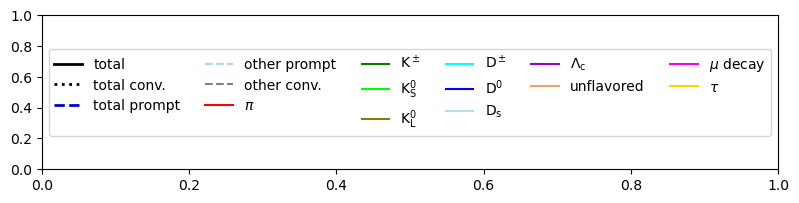

In [14]:
plt.figure(figsize=(9.5, 2.0))
legend = plt.legend(handles, labels, loc="center", ncol=6, mode="expand", frameon=True)


def export_legend(legend, filename, expand=4 * [0]):  # [-1,-1,1,1]):
    fig = legend.figure
    fig.canvas.draw()
    bbox = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    # nbu.save(filename, dpi=300, bbox_inches=bbox)


export_legend(legend, "hadr_breakdown_legend")
plt.show()

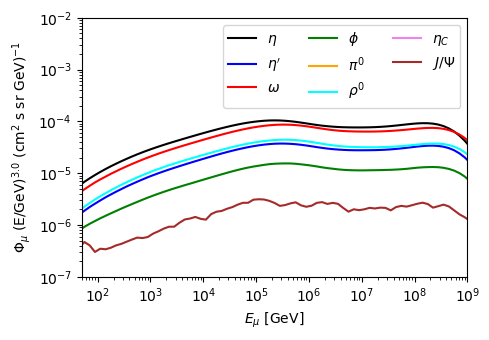

In [24]:
fig = plt.figure(figsize=(5, 3.5))

i = 0
unfl = [
    (["eta"], r"$\eta$"),
    (["eta'"], r"$\eta'$"),
    (["omega"], r"$\omega$"),
    (["phi"], r"$\phi$"),
    (["pi0"], r"$\pi^0$"),
    (["rho+", "rho-"], r"$\rho^\pm$"),
    (["rho0"], r"$\rho^0$"),
    (["eta_c"], r"$\eta_C$"),
    (["J/psi"], r"$J/\Psi$"),
]
for pkey, plabel in unfl:
    if pkey in ["eta_c", "pi0"] or plabel in r"$\rho^\pm$":
        continue

    plt.plot(e_grid, mu_obs[plabel], ls="-", lw=1.5, color=color_spectrum[i], label=plabel)
    i += 1

plt.loglog()
plt.xlabel(r"$E_{\mu}$ [GeV]")
plt.ylabel(r"$\Phi_{\mu}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
plt.xlim([50, 1e9])
plt.ylim([1e-7, 1e-2])
plt.legend(loc="upper right", ncol=3)
plt.tight_layout()
# nbu.save("details_mu_unflavored_" + model_str + "_H3a_0.5")

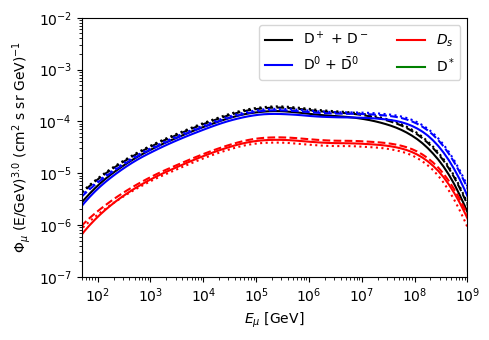

In [26]:
fig = plt.figure(figsize=(5, 3.5))

res_groups_d = [
    (["D+", "D-"], r"D$^+$ + D$^-$"),
    (["D0", "Dbar0"], r"D$^0$ + $\bar{\rm D}^0$"),
    (["D_s+", "D_s-"], "$D_s$"),
    (["D*+", "D*-", "D*0", "D*bar0"], r"D$^*$"),
]

i = 0
for pkey, plabel in res_groups_d:
    plt.plot(e_grid, mu_obs[plabel], ls="-", lw=1.5, color=color_spectrum[i], label=plabel)
    plt.plot(
        e_grid, numu_obs[plabel], ls="--", lw=1.5, color=color_spectrum[i], label="_nolabel_"
    )
    plt.plot(
        e_grid, nue_obs[plabel], ls=":", lw=1.5, color=color_spectrum[i], label="_nolabel_"
    )
    i += 1

plt.loglog()
plt.xlabel(r"$E_{\mu}$ [GeV]")
plt.ylabel(r"$\Phi_{\mu}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
plt.xlim([50, 1e9])
plt.ylim([1e-7, 1e-2])
plt.legend(loc="upper right", ncol=2)
plt.tight_layout()
# plt.grid()